# Inaugural Project

Imports and set magics:

In [169]:
import numpy as np
from types import SimpleNamespace  # Import the SimpleNamespace class from the types module
from scipy import optimize  # Import the optimize module from scipy

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from ExchangeEconomy import ExchangeEconomyPlotter, ExchangeEconomyClass
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The code below describes an exchange economy with two agents A and B, with possible bundles illustrated in the Edgeworth box. The blue dots represents all the Pareto optimal bundles for the two agents, while the red dot illustrates the initial endowment. Thus all the blue dots are located above the initial endowment, they must all be Pareto optimal.

### ExchangeEconomyClass

This class models an exchange economy with two agents, A and B, each with their own preferences and endowments.

### Attributes:
- `par`: A SimpleNamespace object holding model parameters like preferences (`alpha`, `beta`) and endowments (`w1A`, `w2A`).

### Methods:
- `utility_A(x1A, x2A)`: Computes utility for agent A based on the Cobb-Douglas utility function.
- `utility_B(x1B, x2B)`: Computes utility for agent B.
- `demand_A(p1)`: Computes the demand for goods by agent A given a price `p1`.
- `demand_B(p1)`: Computes the demand for goods by agent B.
- `check_market_clearing(p1)`: Checks if the market clears at price `p1` by calculating excess demand.
- `question1()`: Finds and stores allocations that are Pareto improvements.
- `question2()`: Generates a list of prices and corresponding market clearing errors.
- `market_clearing_error(p1)`: Computes the total market clearing error at price `p1`.


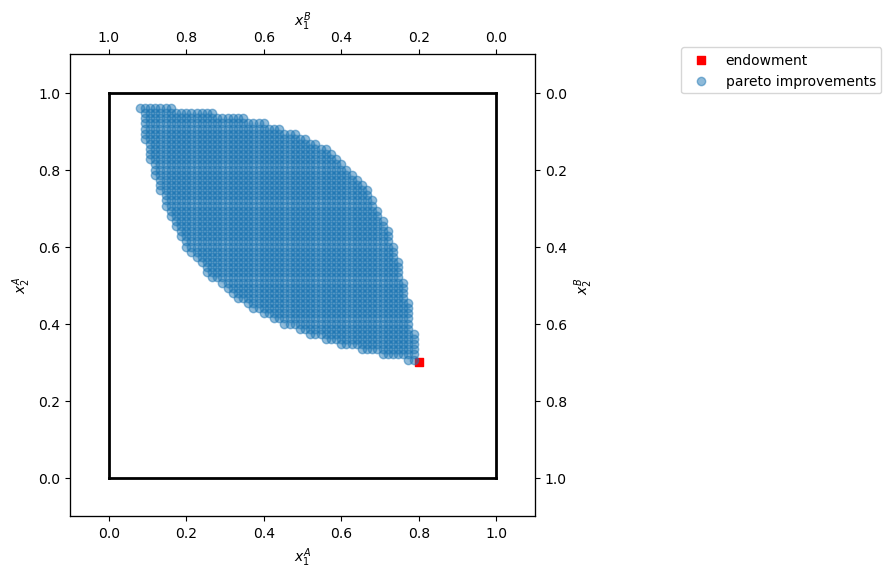

In [170]:
from ExchangeEconomy import ExchangeEconomyClass, ExchangeEconomyPlotter

# Instantiate the economic model
model = ExchangeEconomyClass()

# Instantiate the plotter with the model
plotter = ExchangeEconomyPlotter(model)

# Generate and display the plot
plotter.plot_pareto_improvements()

# Question 2

The following code calculates the error in the market clearing price for the given values of p1. Further, it plots the values of the errors for the given values.

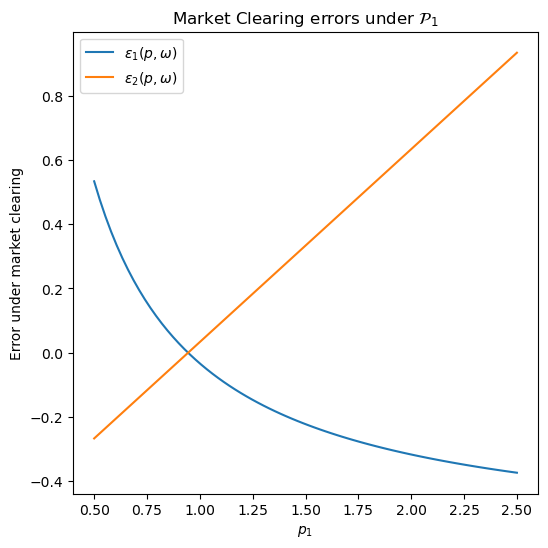

In [171]:
# Plot the market clearing errors
plotter.plot_market_clearing_errors()

# Question 3

Below is the clearing price based on the two market clearing conditions. p1 is thus the market clearing price which is the rate at which one good is exchanged for another such that both agents are satisfied with the trade. Here, no agent has a incentive to deviate.

In [172]:
model = ExchangeEconomyClass()

# Find the market clearing price
optimal_p1 = model.find_market_clearing_price()

# Print the result
print(f"Market clearing price p1: {optimal_p1}")

Market clearing price p1: 0.9444428544211817


# Question 4a

The following code in 4a and 4b calculates the allocations of the two goods in the exchange economy for given constraints. Firstly, we calculate the allocation when the prices can only be chosen from the set defined in exercise 2. And secondly we set the condition that the price can only be stricly positive. 
The procedure is to first calculate the optimal price given the constraints, by setting up the utility maximization problem and thus obtaining the optimal price. We use the optimal price to calculate the corresponding allocations. 
For question 4a, the optimal price of good 1 is found to be around 1.9 and the  corresponding allocation for agent A is (0.62,0.64)
For question 4b, the optimal price of good 1 is also 1.9 and the corresponding allocation for agent A is (0.62, 0.64). It would be optimal to calculate the utility levels for each allocation to see which option benefits agent A the most, but the same for both situations is that the utility of agent B is not taken in to account, thus yielding potential inequality in the economy.

In [182]:
# Instantiate the economic model
model = ExchangeEconomyClass()

# Question 4a
optimal_price_p1_4a, optimal_allocation_A_4a = model.find_optimal_price_for_A_in_P1()
print("Optimal price for 4a:", optimal_price_p1_4a)
print("Optimal allocation for A (4a):", optimal_allocation_A_4a)

Optimal price for 4a: 1.8993461929863074
Optimal allocation for A (4a): (0.6209680844966963, 0.6400435871342461)
Optimal price for 4b: 1.8993461929863074
Optimal allocation for A (4b): (0.6209680844966963, 0.6400435871342461)
Optimal price for 4a: 1.8993461929863074
Optimal allocation for A (4a): (0.6209680844966963, 0.6400435871342461)


# Question 4b

In [174]:
# Instantiate the economic model
model = ExchangeEconomyClass()

# Question 4b
optimal_price_p1_4b, optimal_allocation_A_4b = model.find_optimal_price_for_A_unbounded()
print("Optimal price for 4b:", optimal_price_p1_4b)
print("Optimal allocation for A (4b):", optimal_allocation_A_4b)

Optimal price for 4b: 1.8993461929863074
Optimal allocation for A (4b): (0.6209680844966963, 0.6400435871342461)


# Question 5a

In question 5a and 5b, we need to find the combination of goods that maximizes the utility of agent A while ensuring that agent B's utility remains at least as high as their initial endowment. The code iterates through possible combinations of goods and finally, it prints out the maximum utility of both agents and the corresponding allocations of goods. This ensures that the trade maximizes the utility of agent A while maintaining at least the initial utility level of agent B.

In 5a we need to maximize with the constraint that the optimal bundle must be among the Pareto improvements, seen in the first question. In 5b we maximize on the constraint that the utility of agent B must be at least as good as agent B's initial endowment.

In [175]:
# Instantiate the economic model
model = ExchangeEconomyClass()

# Instantiate the plotter with the model
plotter = ExchangeEconomyPlotter(model)

# Calculate possible values
x1_possible, x2_possible = plotter.calculate_possible_values()

# Find the optimal allocation for agent A
uAmax, x1best, x2best = model.find_optimal_allocation_for_A(x1_possible, x2_possible)

# Print the results
print(f'Utility A max = {uAmax:.3f}: (x1A, x2A) = ({x1best:.3f}, {x2best:.3f})')

Utility A max = 0.742: (x1A, x2A) = (0.560, 0.853)


# Question 5b

In [176]:
# Instantiate the economic model
model = ExchangeEconomyClass()

# Extract the parameters w1A and w2A from the model
w1A = model.par.w1A
w2A = model.par.w2A

# Find the optimal allocation for agent A with constraints
optimal_allocation_A = model.find_optimal_allocation_for_A_with_constraints(w1A, w2A)

# Print the results
print("Optimal allocation chosen by agent A (xA1, xA2):", optimal_allocation_A)

Optimal allocation chosen by agent A (xA1, xA2): [0.57573609 0.84444453]


# Question 6a

The following code calculate the allocation for agent A when a socail planner is maximizing the sum of the utility for both agent A and agent B. The optimal allocation for agent A is to consume x1=0.33333337 og x2=0.66666663, therefore it is the opposite for agent B. This result make sense given that the marginal utility for agent A is higher for x2 than x1 due to alpha=1/3 and vice versa with agent B. 

In [177]:

# Instantiate the economic model
model = ExchangeEconomyClass()

# Find the optimal allocation to maximize aggregate utility
optimal_allocation_A = model.find_optimal_allocation_to_maximize_aggregate_utility()

# Print the results
print("Optimal allocation chosen to maximize aggregate utility (xA1, xA2):", optimal_allocation_A)

Optimal allocation chosen to maximize aggregate utility (xA1, xA2): (0.3333333659693852, 0.6666666260640767)


# Question 6b

The following code gives a visuel output of all allocation point for agent A. From the graph we see that some of the allocations are outside the edgeworth box from question 1 and therefore not a pareto improvement. The others are more difficult from only the graph to identify which is more optimal for both agents. 

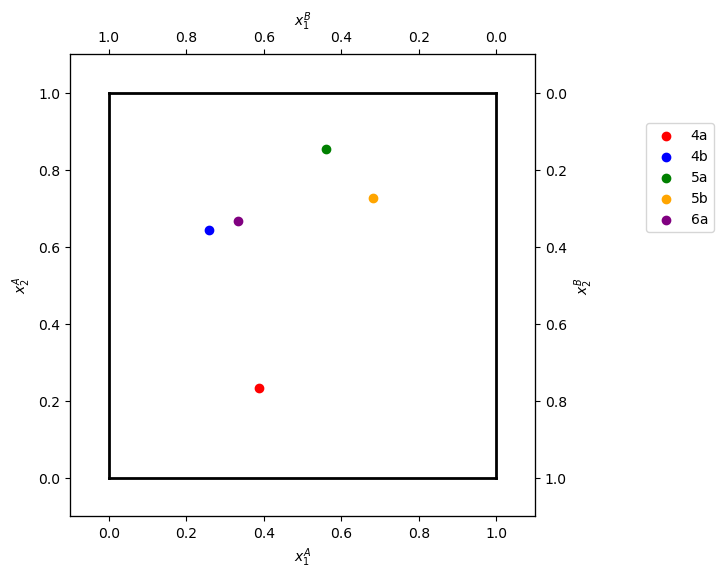

In [178]:
from ExchangeEconomy import ExchangeEconomyVisualizer

visualizer = ExchangeEconomyVisualizer()

# Define the points and their names and colors
points = [(0.3866665387427768, 0.23333439936404454),
          (0.2592605716231704, 0.642855515783427),
          (0.560, 0.853),
          (0.68087076, 0.72506828),
          (0.33333337, 0.66666663)]
point_labels = ['4a', '4b', '5a', '5b', '6a']
colors = ['red', 'blue', 'green', 'orange', 'purple']

visualizer.plot_points(points, point_labels, colors)


# Question 7

The following code generates a random set of endowments that are restricted to being uniformly distributed and plots them. As this is random, there is not much intuition to apply to this.

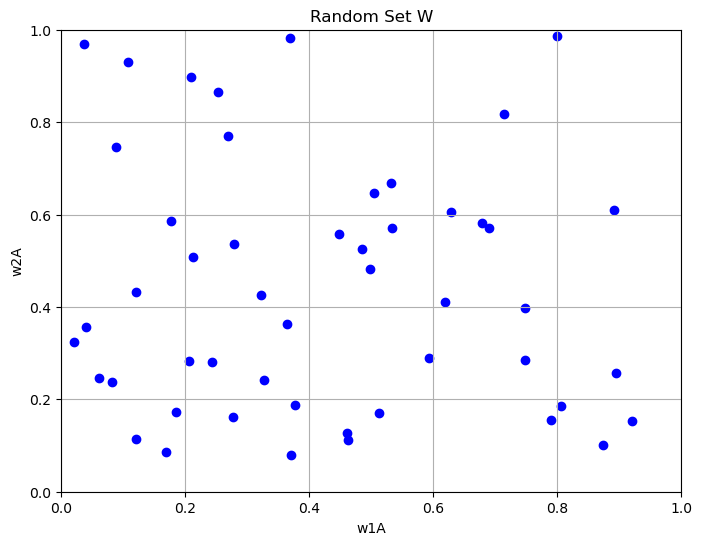

In [179]:
visualizer = ExchangeEconomyVisualizer()

# Number of elements in the set
num_elements = 50

visualizer.plot_random_set(num_elements)

# Question 8

The following code generates a contract curve of the market equilibrium, plotted in the edgeworth box. 

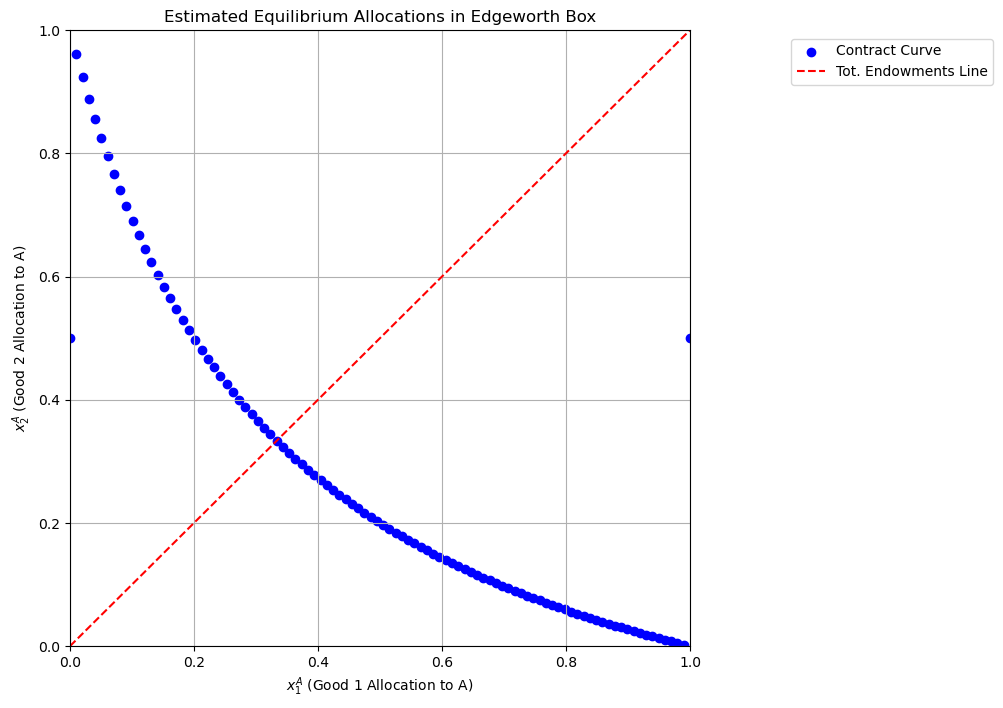

In [180]:
# Instantiate the economic model and visualizer
model = ExchangeEconomyClass()
visualizer = ExchangeEconomyVisualizer()

# Find the contract curve allocations
contract_allocations = model.find_contract_curve()

# Plot the estimated equilibrium allocations in the Edgeworth box
visualizer.plot_estimated_equilibrium_allocations(contract_allocations)